<font color = green >

## Home Task

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use elbow method to determine the best k for Kmeans


In [14]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

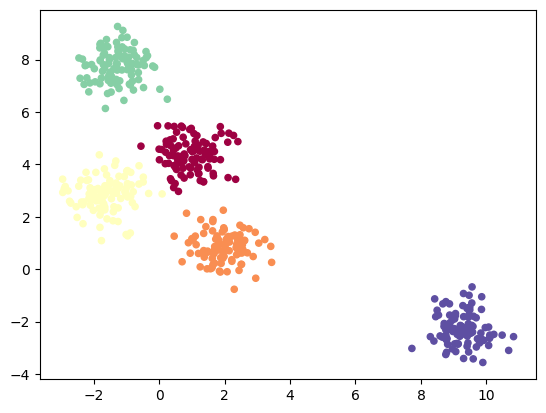

In [15]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)    

### Agglomerative clustering (complete linkage)

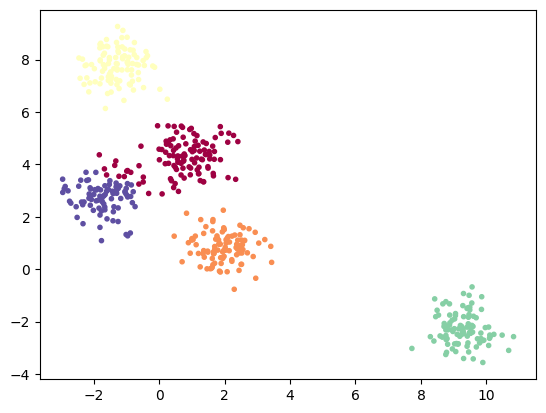

In [16]:
agg_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
agg_complete.fit_predict(X)
clusters = agg_complete.labels_
plt.scatter(X[:,0], X[:,1], c= colors[clusters], marker= '.')

### Agglomerative clustering (single linkage)

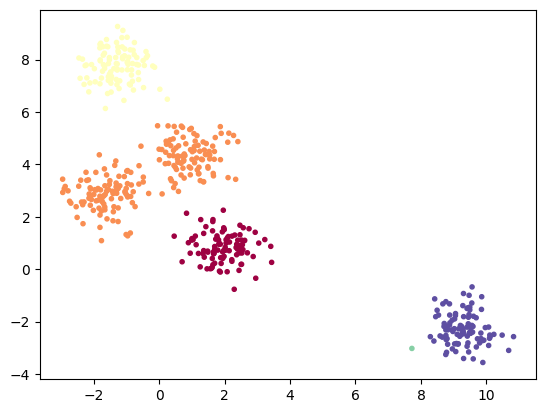

In [17]:
agg_single = AgglomerativeClustering(n_clusters=5, linkage='single')
agg_single.fit_predict(X)
clusters = agg_single.labels_
plt.scatter(X[:,0], X[:,1], c= colors[clusters], marker= '.')

### DBSCAN

In [20]:
def apply_db_scan(points, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(points)
    predicted = dbscan.labels_
    n_clusters_and_noice = len(np.unique(predicted))-1
    #print ('n_clusters_and_noice ={}\n'.format(n_clusters_and_noice))

    predicted[np.where(predicted == -1)] = n_clusters_and_noice
    return predicted 

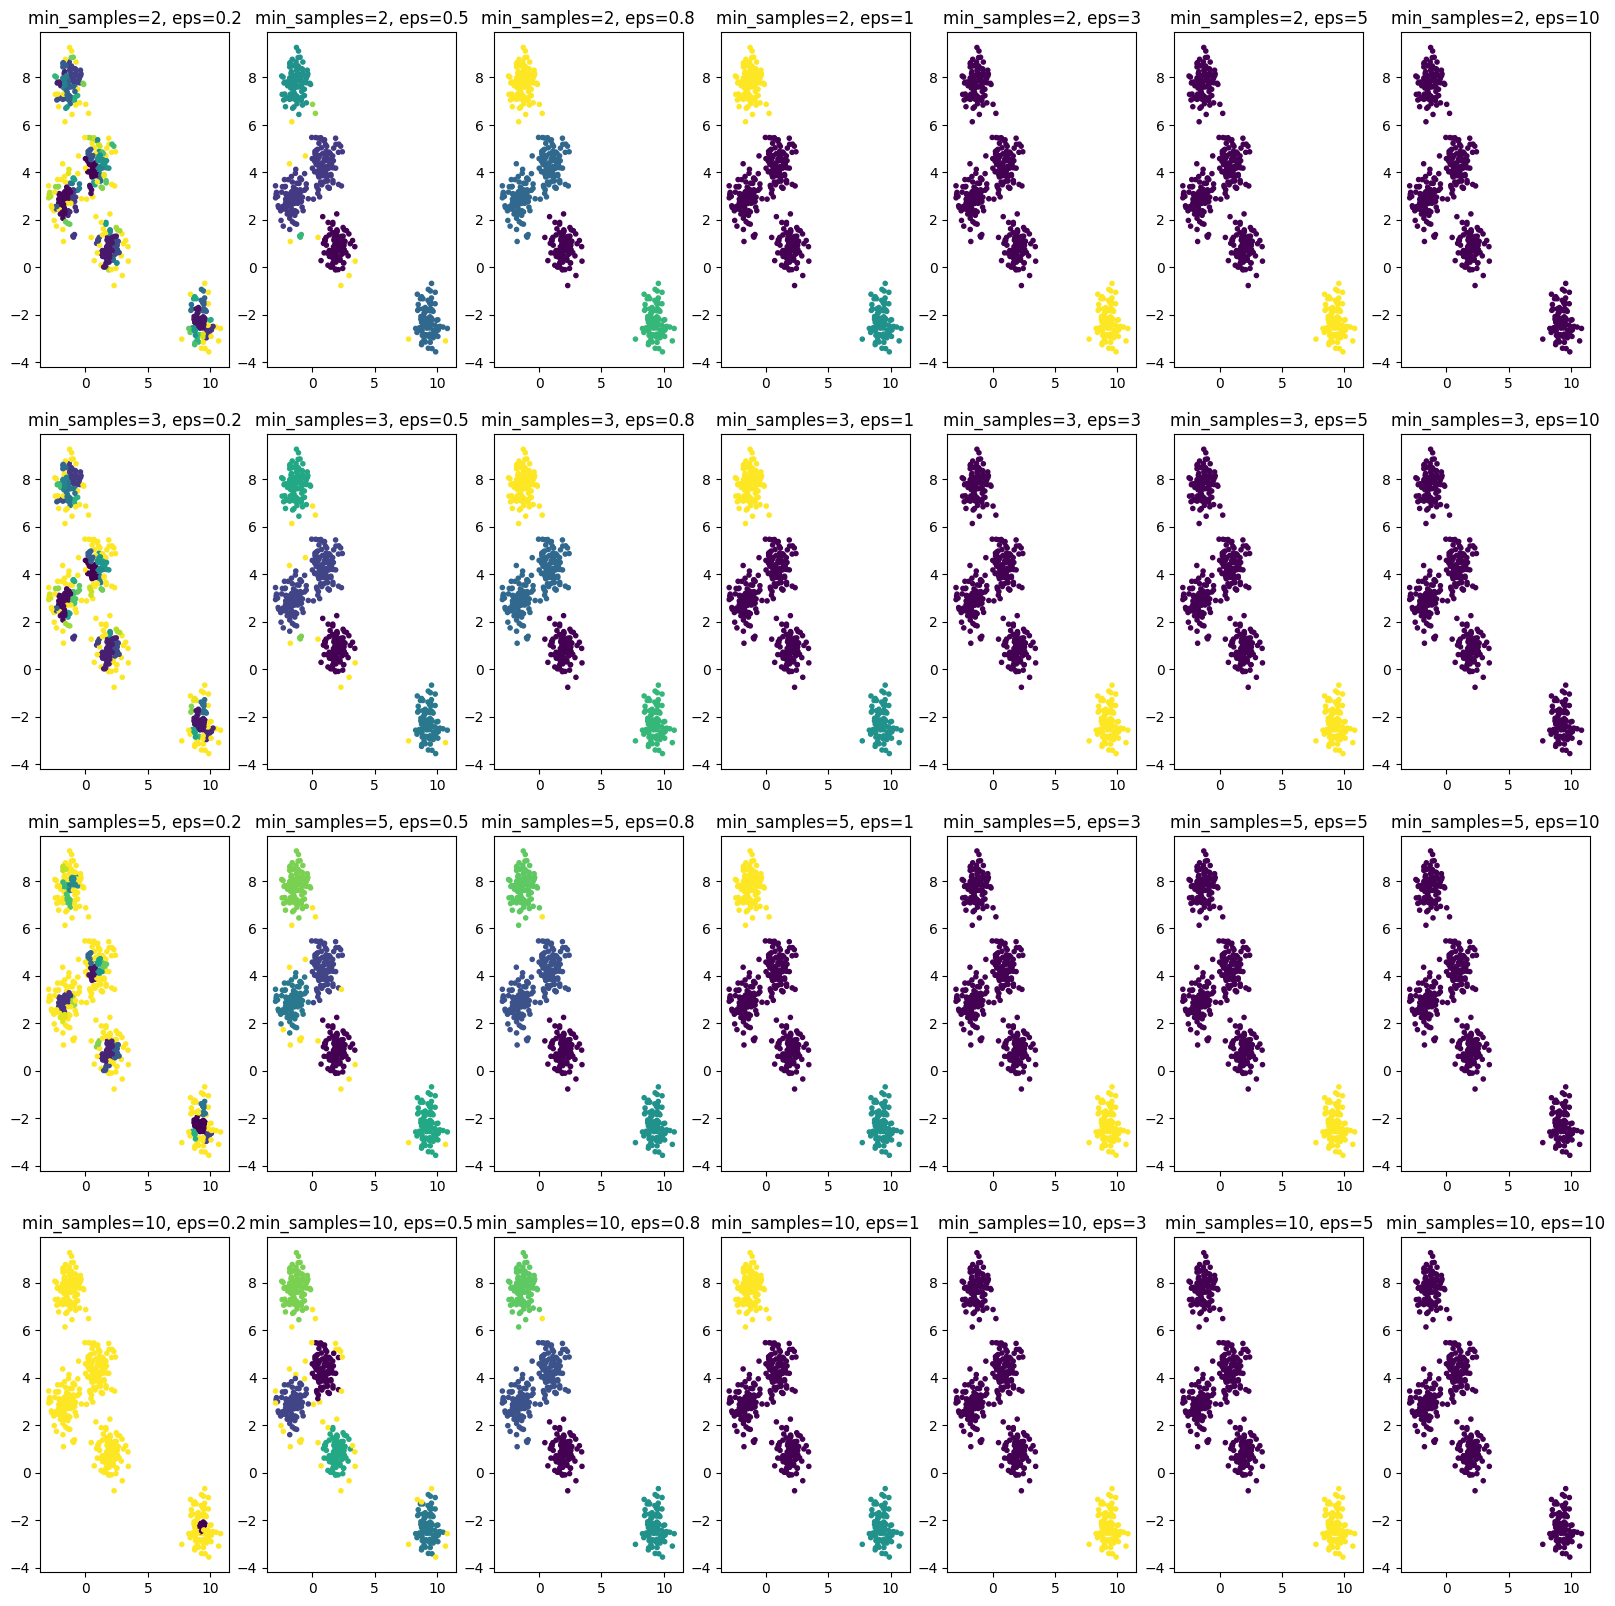

In [24]:
samples = [2, 3, 5, 10]
eps = [0.2, 0.5, 0.8, 1, 3, 5, 10]
i = 1
plt.figure(figsize=(20, 20))

for sample in samples:
    for e in eps:
        clusters = apply_db_scan(X, e, sample)
        plt.subplot(4, 7, i)
        plt.scatter(X[:,0], X[:,1], c= clusters, marker= '.')
        plt.title(f"min_samples={sample}, eps={e}")
        i += 1

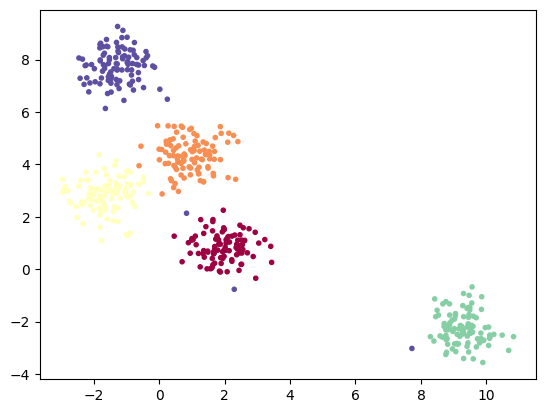

In [31]:
dbscan = DBSCAN(eps=0.7, min_samples=10).fit(X)
predicted = dbscan.labels_
plt.scatter(X[:,0], X[:,1], c= colors[predicted], marker= '.')

### Elbow method

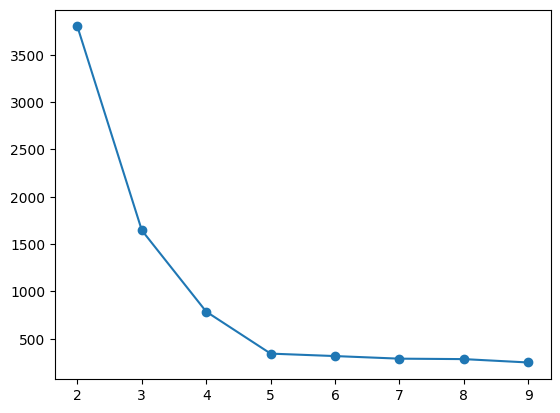

In [ ]:
n_clusters = range(2, 10)
inertia = [KMeans(n_clusters=n).fit(X).inertia_ for n in n_clusters]

plt.plot(n_clusters, inertia, marker='o')

the best k for Kmeans is 4 or 5

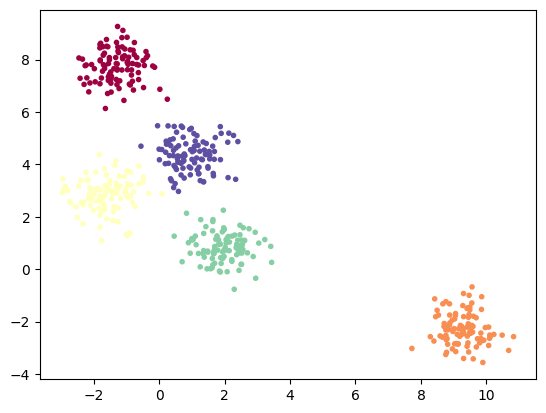

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

clusters = kmeans.labels_
plt.scatter(X[:,0], X[:,1], c= colors[clusters], marker= '.')